In [1]:
import numpy as np
import pandas as pd
import json
from path import Path
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# set variable equal to loaded dataset
tracks_df = pd.read_csv('popular_songs.csv', error_bad_lines=False)
tracks_df.head()

b'Skipping line 3520: expected 16 fields, saw 17\nSkipping line 3613: expected 16 fields, saw 17\nSkipping line 3718: expected 16 fields, saw 17\nSkipping line 3879: expected 16 fields, saw 17\nSkipping line 3983: expected 16 fields, saw 17\nSkipping line 4083: expected 16 fields, saw 17\nSkipping line 4187: expected 16 fields, saw 17\nSkipping line 4297: expected 16 fields, saw 17\nSkipping line 4399: expected 16 fields, saw 17\nSkipping line 4492: expected 16 fields, saw 17\nSkipping line 4576: expected 16 fields, saw 17\nSkipping line 4699: expected 16 fields, saw 17\nSkipping line 4777: expected 16 fields, saw 17\nSkipping line 4872: expected 16 fields, saw 17\nSkipping line 4985: expected 16 fields, saw 17\nSkipping line 5098: expected 16 fields, saw 17\nSkipping line 5199: expected 16 fields, saw 17\nSkipping line 5290: expected 16 fields, saw 17\nSkipping line 5349: expected 16 fields, saw 17\nSkipping line 5494: expected 16 fields, saw 17\n'


,song,artist,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,popular_date,ranking,weeks_on_board,genres
0,Take What You Want (feat. Ozzy Osbourne & Trav...,Post Malone,2019-09-06,76.0,0.0906,0.499,0.800,0.000000,0.1470,-2.665,0.0502,139.919,2020-01-25 00:00:00,70,19,"dfw rap, melodic rap, rap"
1,RITMO (Bad Boys For Life),Black Eyed Peas,2019-10-12,78.0,0.0334,0.721,0.716,0.000840,0.2370,-7.037,0.0657,104.994,2020-01-25 00:00:00,67,8,"dance pop, pop, pop rap"
2,BEST ON EARTH (feat. BIA) - Bonus,Russ,2020-01-31,71.0,0.1880,0.846,0.748,0.000000,0.0930,-3.512,0.0780,90.006,2020-01-25 00:00:00,68,6,"hawaiian hip hop, pop rap, rap"
3,Tusa,Various Artists,2019-12-20,45.0,0.2950,0.803,0.715,0.000134,0.0574,-3.280,0.2980,101.085,2020-01-25 00:00:00,69,7,NaN
4,I Wish Grandpas Never Died,Riley Green,2019-09-20,71.0,0.0360,0.445,0.492,0.000000,0.1220,-5.717,0.0294,148.013,2020-01-25 00:00:00,75,3,"contemporary country, country road"


-------------------------------------------------------------------------------

# Look at the data and transform as needed before training for the Machine Learning

In [3]:
# Describe and transpose the dataframe
tracks_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,52395.0,63.208398,16.218658,0.000000,57.0000,66.0000,73.000000,97.000
acousticness,52395.0,0.166375,0.209721,0.000014,0.0219,0.0754,0.228000,0.996
danceability,52395.0,0.646721,0.135772,0.076800,0.5570,0.6520,0.742000,0.981
energy,52395.0,0.676498,0.166208,0.002310,0.5670,0.6980,0.805000,0.996
instrumentalness,52395.0,0.010053,0.076090,0.000000,0.0000,0.0000,0.000011,0.973
liveness,52395.0,0.178256,0.135081,0.020000,0.0945,0.1240,0.224000,0.989
loudness,52395.0,-5.936540,2.303629,-42.887000,-7.0310,-5.6030,-4.421000,0.175
speechiness,52395.0,0.101920,0.102682,0.022500,0.0378,0.0554,0.121000,0.951
tempo,52395.0,122.542894,28.346675,48.718000,99.6430,122.5040,140.309000,208.067
ranking,52504.0,50.524322,28.870208,1.000000,26.0000,51.0000,76.000000,100.000


In [4]:
# Gets rid of white space before and after each column name
tracks_df.columns = tracks_df.columns.str.strip()
tracks_df.head()

,song,artist,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,popular_date,ranking,weeks_on_board,genres
0,Take What You Want (feat. Ozzy Osbourne & Trav...,Post Malone,2019-09-06,76.0,0.0906,0.499,0.800,0.000000,0.1470,-2.665,0.0502,139.919,2020-01-25 00:00:00,70,19,"dfw rap, melodic rap, rap"
1,RITMO (Bad Boys For Life),Black Eyed Peas,2019-10-12,78.0,0.0334,0.721,0.716,0.000840,0.2370,-7.037,0.0657,104.994,2020-01-25 00:00:00,67,8,"dance pop, pop, pop rap"
2,BEST ON EARTH (feat. BIA) - Bonus,Russ,2020-01-31,71.0,0.1880,0.846,0.748,0.000000,0.0930,-3.512,0.0780,90.006,2020-01-25 00:00:00,68,6,"hawaiian hip hop, pop rap, rap"
3,Tusa,Various Artists,2019-12-20,45.0,0.2950,0.803,0.715,0.000134,0.0574,-3.280,0.2980,101.085,2020-01-25 00:00:00,69,7,NaN
4,I Wish Grandpas Never Died,Riley Green,2019-09-20,71.0,0.0360,0.445,0.492,0.000000,0.1220,-5.717,0.0294,148.013,2020-01-25 00:00:00,75,3,"contemporary country, country road"


In [5]:
# Drop columns that are not needed for the ML Model
new_tracks_df = tracks_df.drop(['song','artist','release_date','genres','popular_date'], axis =1)

# Drop the null columns where all values are null
new_tracks_df = new_tracks_df.dropna(axis='columns', how='all')

# Drop the null rows
new_tracks_df = new_tracks_df.dropna()
new_tracks_df.tail()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,ranking,weeks_on_board
52499,60.0,0.01950,0.760,0.696,0.0000,0.2780,-5.811,0.0491,127.029,28,19
52500,52.0,0.02730,0.589,0.893,0.0000,0.3430,-2.948,0.0397,92.011,33,8
52501,63.0,0.00453,0.724,0.870,0.0000,0.8330,-3.614,0.1130,93.010,34,6
52502,53.0,0.02770,0.590,0.735,0.0000,0.0818,-4.924,0.2970,102.076,35,9
52503,58.0,0.00450,0.611,0.827,0.0132,0.0283,-4.665,0.0876,190.058,36,8


In [6]:
# Create a dataframe from the weeks_on_board column
wob_df = pd.DataFrame(new_tracks_df['weeks_on_board'])
# Use .describe to find the average amount of time that a song remains on the top 100 Billboard
wob_df.describe()

,weeks_on_board
count,52395.000000
mean,12.278118
std,10.130632
min,1.000000
25%,4.000000
50%,10.000000
75%,17.000000
max,87.000000


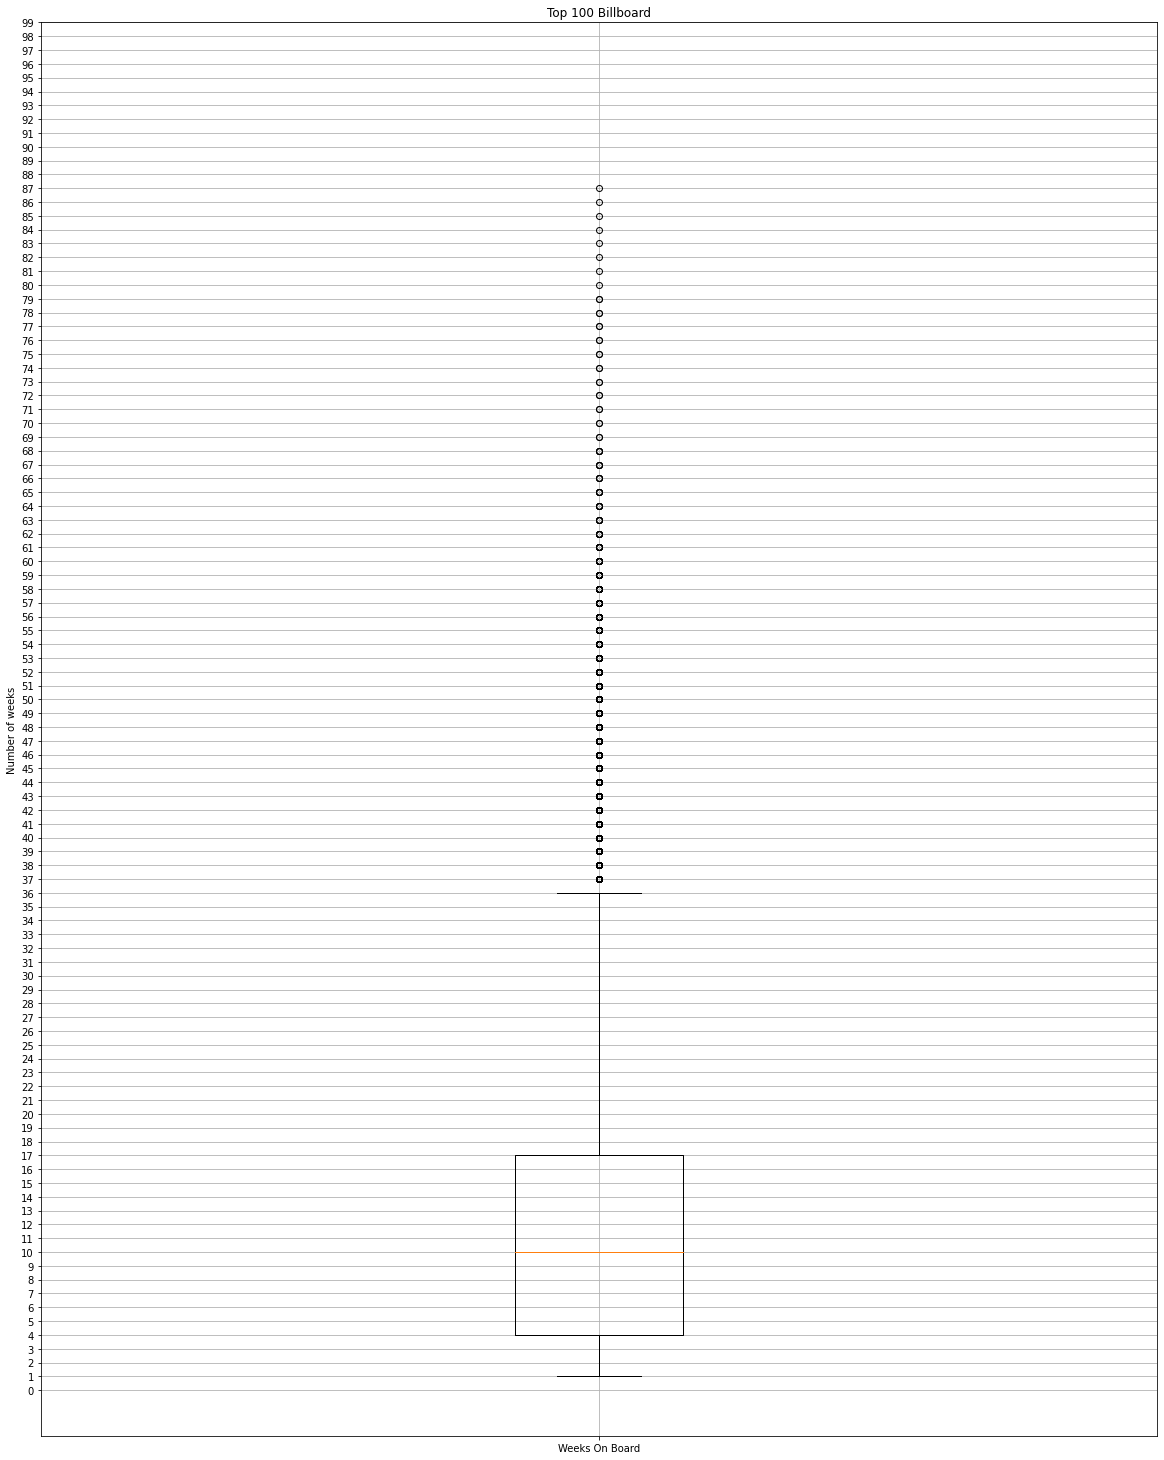

In [7]:
# Create a box-and-whisker plot for the number of weeks on the board.
# Outliers are values that are above 36 weeks on the board.

x_labels = ["Weeks On Board"]
fig, ax = plt.subplots(figsize=(20,26))
ax.boxplot(wob_df, labels=x_labels)
# Add the title, y-axis label and grid
ax.set_title("Top 100 Billboard")
ax.set_ylabel("Number of weeks")
ax.set_yticks(np.arange(0, 100, step=1.0))
ax.grid()
plt.show()

In [8]:
# Adds a new column with the name 'target' at the end of the dataframe
header_list = ['popularity', 'acousticness', 'danceability', 
               'energy', 'instrumentalness', 'liveness', 'loudness', 
               'speechiness', 'tempo', 'ranking', 'weeks_on_board', 'target']
new_tracks_df = new_tracks_df.reindex(columns = header_list)
new_tracks_df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,ranking,weeks_on_board,target
0,76.0,0.0906,0.499,0.800,0.000000,0.1470,-2.665,0.0502,139.919,70,19,NaN
1,78.0,0.0334,0.721,0.716,0.000840,0.2370,-7.037,0.0657,104.994,67,8,NaN
2,71.0,0.1880,0.846,0.748,0.000000,0.0930,-3.512,0.0780,90.006,68,6,NaN
3,45.0,0.2950,0.803,0.715,0.000134,0.0574,-3.280,0.2980,101.085,69,7,NaN
4,71.0,0.0360,0.445,0.492,0.000000,0.1220,-5.717,0.0294,148.013,75,3,NaN


In [9]:
# The average number of weeks that a song is on the billboard is 12 weeks.
# Create a for loop that determines if the row value in weeks_on_board column is greater than or equal to 12 and assign
# it a new value of 0 and add it to the 'target' column and everything else change to a 1.
for index in new_tracks_df.index:
    if new_tracks_df.loc[index,'weeks_on_board']>=12:
        new_tracks_df.loc[index,'target'] = 0
    else:
        new_tracks_df.loc[index,'target'] = 1

In [10]:
new_tracks_df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,ranking,weeks_on_board,target
0,76.0,0.0906,0.499,0.800,0.000000,0.1470,-2.665,0.0502,139.919,70,19,0.0
1,78.0,0.0334,0.721,0.716,0.000840,0.2370,-7.037,0.0657,104.994,67,8,1.0
2,71.0,0.1880,0.846,0.748,0.000000,0.0930,-3.512,0.0780,90.006,68,6,1.0
3,45.0,0.2950,0.803,0.715,0.000134,0.0574,-3.280,0.2980,101.085,69,7,1.0
4,71.0,0.0360,0.445,0.492,0.000000,0.1220,-5.717,0.0294,148.013,75,3,1.0


In [12]:
# Drops the weeks_on_board column since we are using the 'target' column
target_tracks_df = new_tracks_df.drop(['popularity', 'acousticness', 'danceability', 
               'energy', 'instrumentalness', 'liveness', 'loudness', 
               'speechiness', 'tempo','weeks_on_board'], axis=1)
target_tracks_df.head()

,ranking,target
0,70,0.0
1,67,1.0
2,68,1.0
3,69,1.0
4,75,1.0


In [13]:
# Create our features
X = target_tracks_df.drop(columns = "target")
#X = pd.get_dummies(X)

# Create our target
y = target_tracks_df["target"]

In [14]:
X.describe()

,ranking
count,52395.000000
mean,50.471037
std,28.863363
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [15]:
# Check the balance of our target values
y.value_counts()

1.0    29045
0.0    23350
Name: target, dtype: int64

### Training

In [16]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.10,
                                                    random_state = 1)

In [17]:
# Check number of examples we have in our train data set
X_train.shape

(47155, 1)

In [18]:
# Check number of examples we have in our test data set
X_test.shape

(5240, 1)

### Standardization: StandardScaler

In [19]:
# Create scaler with default parameters
scaler = StandardScaler()

In [20]:
# Fits the scaler passing the training data and transforms the data
# Returns it to variable "train_scaled"
train_scaled = scaler.fit_transform(X_train)

In [21]:
# Transforms test data the same way
test_scaled = scaler.transform(X_test)

-------------------------------------------------------------------------------

# Use the Nueral Network MLPClassifier ML Model for the target_tracks_df
    1. This dataframe excludes the number of weeks on the board and instead uses a binary outcome. This binary values was determined by if the weeks on board is greater than or equal to 12 then change to 0, else change to a 1.

In [22]:
# Initializing the MLPClassifier
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', random_state=42, max_iter=2500)

In [23]:
# Fitting the training data to the network
model.fit(train_scaled, y_train)

MLPClassifier(max_iter=2500, random_state=42, solver='lbfgs')

In [24]:
# Import the accuracy_score and declare the predictor variable
y_pred = model.predict(test_scaled)

In [25]:
# Accuracy score of our training data
# max_iter results
# 3000 = 73.03573322023115
# 2500 = 73.03573322023115
# 2000 = 72.9466652528894
# 1000 = 72.72611600042413

train_acc = accuracy_score(y_train, model.predict(train_scaled))*100
print(train_acc)

68.9725373767363


In [26]:
# Accuracy score of our test data
# max_iter results
# 3000 = 70.24809160305342
# 2500 = 70.24809160305342
# 2000 = 70.38167938931298
# 1000 = 69.80916030534351

test_acc = accuracy_score(y_test, y_pred)*100
print(test_acc)

68.33969465648855


In [27]:
# Generates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {test_acc}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1643,676
Actual 1,983,1938


Accuracy Score : 68.33969465648855
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.66      2319
         1.0       0.74      0.66      0.70      2921

    accuracy                           0.68      5240
   macro avg       0.68      0.69      0.68      5240
weighted avg       0.69      0.68      0.68      5240



-------------------------------------------------------------------------------

# Use the Random Forest ML Model for the target_tracks_df

In [28]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=4096, random_state=78)

In [29]:
# Fitting the model
rf_model = rf_model.fit(train_scaled, y_train)

In [30]:
# Making predictions using the testing data.
predictions = rf_model.predict(test_scaled)

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_df

,Predicted 0,Predicted 1
Actual 0,1643,676
Actual 1,983,1938


In [32]:
# accuracy from training data
accuracy_score(y_train, rf_model.predict(train_scaled))*100

68.9725373767363

In [33]:
# Calculating the accuracy score from test data
acc_score = accuracy_score(y_test, predictions)
print((acc_score)*100)

68.33969465648855


In [34]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1643,676
Actual 1,983,1938


Accuracy Score : 0.6833969465648855
Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.71      0.66      2319
         1.0       0.74      0.66      0.70      2921

    accuracy                           0.68      5240
   macro avg       0.68      0.69      0.68      5240
weighted avg       0.69      0.68      0.68      5240



In [35]:
# Calculate feature importance in the Random Forest model
importances = rf_model.feature_importances_
importances

array([1.])

In [36]:
# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(1.0, 'ranking')]

-------------------------------------------------------------------------------

# Use the KNeighborsRegressor ML Model for the target_tracks_df

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knr_model = KNeighborsRegressor(n_neighbors=7)

In [38]:
knr_model.fit(train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [39]:
knr_mse = mean_squared_error(y_train, knr_model.predict(train_scaled))
knr_mae = mean_absolute_error(y_train, knr_model.predict(train_scaled))

In [40]:
print("mse = ",knr_mse," & mae = ",knr_mae," & rmse = ", sqrt(knr_mse))

mse =  0.23723240117805156  & mae =  0.4131723646939424  & rmse =  0.4870650892622582


In [41]:
test_mse = mean_squared_error(y_test, knr_model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, knr_model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  0.23943371241626424  & mae =  0.4154580152671756  & rmse =  0.4893196423773158


-------------------------------------------------------------------------------

# Use the KNeighborsClassifier ML Model for the target_tracks_df

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knc_model = KNeighborsClassifier(n_neighbors=10)

In [43]:
knc_model.fit(train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
knc_mse = mean_squared_error(y_train, knc_model.predict(train_scaled))
knc_mae = mean_absolute_error(y_train, knc_model.predict(train_scaled))

In [45]:
print("mse = ",knc_mse," & mae = ",knc_mae," & rmse = ", sqrt(knc_mse))

mse =  0.3276852931820592  & mae =  0.3276852931820592  & rmse =  0.5724380256255337


In [46]:
test_mse = mean_squared_error(y_test, knc_model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, knc_model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

mse =  0.3295801526717557  & mae =  0.3295801526717557  & rmse =  0.574090718155028
